# SPRINGBOARD DATA SCIENCE PREP COURSE - MINI PROJECTS - PART 09

## 10 minutes to pandas

#### This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

### 01. Import Numpy and Pandas

In [1]:
import numpy as np
import pandas as pd

### 02. Object creation

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

#### Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range("20130101", periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [7]:
df

,A,B,C,D
2013-01-01,-1.808177,2.551838,1.667630,-0.603480
2013-01-02,-0.792926,0.156286,0.180939,1.702806
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613
2013-01-04,-1.218515,-0.004564,0.300932,0.433055
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222


#### Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:

In [8]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#### The columns of the resulting DataFrame have different dtypes:

In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
df2.<TAB>  # noqa: E225, E999
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated

SyntaxError: invalid syntax (Temp/ipykernel_22540/1070043991.py, line 1)

#### As you can see, the columns A, B, C, and D are automatically tab completed. E and F are there as well; the rest of the attributes have been truncated for brevity.

### 02. Viewing data

In [13]:
df.head()

,A,B,C,D
2013-01-01,-1.808177,2.551838,1.667630,-0.603480
2013-01-02,-0.792926,0.156286,0.180939,1.702806
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613
2013-01-04,-1.218515,-0.004564,0.300932,0.433055
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.218515,-0.004564,0.300932,0.433055
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222


#### Display the index, columns:

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

#### DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

#### For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:

In [17]:
df.to_numpy()

array([[-1.80817733,  2.55183764,  1.66763021, -0.60347959],
       [-0.79292645,  0.15628574,  0.18093941,  1.70280618],
       [-1.05962529,  0.50771676, -0.14795026, -0.28661255],
       [-1.21851471, -0.00456411,  0.30093219,  0.43305489],
       [-1.73649332, -0.0966187 , -1.43061456,  0.15773149],
       [-1.77011611, -1.26458849,  1.26048416, -1.2062218 ]])

In [18]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

#### DataFrame.to_numpy() does not include the index or column labels in the output.

#### describe() shows a quick statistic summary of your data:

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-1.397642,0.308345,0.305237,0.032880
std,0.432231,1.251572,1.095686,1.000678
min,-1.808177,-1.264588,-1.430615,-1.206222
25%,-1.761710,-0.073605,-0.065728,-0.524263
50%,-1.477504,0.075861,0.240936,-0.064441
75%,-1.099348,0.419859,1.020596,0.364224
max,-0.792926,2.551838,1.667630,1.702806


#### Transposing your data:

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.808177,-0.792926,-1.059625,-1.218515,-1.736493,-1.770116
B,2.551838,0.156286,0.507717,-0.004564,-0.096619,-1.264588
C,1.667630,0.180939,-0.147950,0.300932,-1.430615,1.260484
D,-0.603480,1.702806,-0.286613,0.433055,0.157731,-1.206222


#### Sorting by an axis:

In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.603480,1.667630,2.551838,-1.808177
2013-01-02,1.702806,0.180939,0.156286,-0.792926
2013-01-03,-0.286613,-0.147950,0.507717,-1.059625
2013-01-04,0.433055,0.300932,-0.004564,-1.218515
2013-01-05,0.157731,-1.430615,-0.096619,-1.736493
2013-01-06,-1.206222,1.260484,-1.264588,-1.770116


#### Sorting by values:

In [22]:
df.sort_values(by="B")

,A,B,C,D
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731
2013-01-04,-1.218515,-0.004564,0.300932,0.433055
2013-01-02,-0.792926,0.156286,0.180939,1.702806
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613
2013-01-01,-1.808177,2.551838,1.667630,-0.603480


### 03. Selection

#### [NOTE] While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

#### See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.

### 03.01.Getting

#### Selecting a single column, which yields a Series, equivalent to df.A:

In [23]:
df["A"]

2013-01-01   -1.808177
2013-01-02   -0.792926
2013-01-03   -1.059625
2013-01-04   -1.218515
2013-01-05   -1.736493
2013-01-06   -1.770116
Freq: D, Name: A, dtype: float64

#### Selecting via [], which slices the rows:

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-1.808177,2.551838,1.667630,-0.603480
2013-01-02,-0.792926,0.156286,0.180939,1.702806
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.792926,0.156286,0.180939,1.702806
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613
2013-01-04,-1.218515,-0.004564,0.300932,0.433055


### 03.02 Selection by label

#### See more in Selection by Label.

#### For getting a cross section using a label:

In [26]:
df.loc[dates[0]]

A   -1.808177
B    2.551838
C    1.667630
D   -0.603480
Name: 2013-01-01 00:00:00, dtype: float64

#### Selecting on a multi-axis by label:

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-1.808177,2.551838
2013-01-02,-0.792926,0.156286
2013-01-03,-1.059625,0.507717
2013-01-04,-1.218515,-0.004564
2013-01-05,-1.736493,-0.096619
2013-01-06,-1.770116,-1.264588


#### Showing label slicing, both endpoints are included:

In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.792926,0.156286
2013-01-03,-1.059625,0.507717
2013-01-04,-1.218515,-0.004564


#### Reduction in the dimensions of the returned object:

In [29]:
df.loc["20130102", ["A", "B"]]

A   -0.792926
B    0.156286
Name: 2013-01-02 00:00:00, dtype: float64

#### For getting a scalar value:

In [30]:
df.loc[dates[0], "A"]

-1.808177329902815

#### For getting fast access to a scalar (equivalent to the prior method):

In [31]:
df.at[dates[0], "A"]

-1.808177329902815

### 03.03 Selection by position

#### See more in Selection by Position.

#### Select via the position of the passed integers:

In [32]:
df.iloc[3]

A   -1.218515
B   -0.004564
C    0.300932
D    0.433055
Name: 2013-01-04 00:00:00, dtype: float64

#### By integer slices, acting similar to NumPy/Python:

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.218515,-0.004564
2013-01-05,-1.736493,-0.096619


#### By lists of integer position locations, similar to the NumPy/Python style:

In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.792926,0.180939
2013-01-03,-1.059625,-0.147950
2013-01-05,-1.736493,-1.430615


#### For slicing rows explicitly:

In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.792926,0.156286,0.180939,1.702806
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613


#### For slicing columns explicitly:

In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,2.551838,1.667630
2013-01-02,0.156286,0.180939
2013-01-03,0.507717,-0.147950
2013-01-04,-0.004564,0.300932
2013-01-05,-0.096619,-1.430615
2013-01-06,-1.264588,1.260484


#### For getting a value explicitly:

In [37]:
df.iloc[1, 1]

0.15628573604066961

#### For getting fast access to a scalar (equivalent to the prior method):

In [38]:
df.iat[1, 1]

0.15628573604066961

### 03.04 Boolean indexing

#### Using a single column’s values to select data:

In [39]:
df[df["A"] > 0]

,A,B,C,D


#### Selecting values from a DataFrame where a boolean condition is met:

In [43]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,2.551838,1.667630,NaN
2013-01-02,NaN,0.156286,0.180939,1.702806
2013-01-03,NaN,0.507717,NaN,NaN
2013-01-04,NaN,NaN,0.300932,0.433055
2013-01-05,NaN,NaN,NaN,0.157731
2013-01-06,NaN,NaN,1.260484,NaN


In [41]:
df

,A,B,C,D
2013-01-01,-1.808177,2.551838,1.667630,-0.603480
2013-01-02,-0.792926,0.156286,0.180939,1.702806
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613
2013-01-04,-1.218515,-0.004564,0.300932,0.433055
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222


#### Using the isin() method for filtering:

In [44]:
df2 = df.copy()

In [45]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [46]:
df2

,A,B,C,D,E
2013-01-01,-1.808177,2.551838,1.667630,-0.603480,one
2013-01-02,-0.792926,0.156286,0.180939,1.702806,one
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613,two
2013-01-04,-1.218515,-0.004564,0.300932,0.433055,three
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731,four
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222,three


In [47]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613,two
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731,four


### 03.05 Setting

#### Setting a new column automatically aligns the data by the indexes:

In [48]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [49]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [50]:
df["F"] = s1

In [51]:
df

,A,B,C,D,F
2013-01-01,-1.808177,2.551838,1.667630,-0.603480,NaN
2013-01-02,-0.792926,0.156286,0.180939,1.702806,1.0
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613,2.0
2013-01-04,-1.218515,-0.004564,0.300932,0.433055,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731,4.0
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222,5.0


#### Setting values by label:

In [52]:
df.at[dates[0], "A"] = 0

In [53]:
df

,A,B,C,D,F
2013-01-01,0.000000,2.551838,1.667630,-0.603480,NaN
2013-01-02,-0.792926,0.156286,0.180939,1.702806,1.0
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613,2.0
2013-01-04,-1.218515,-0.004564,0.300932,0.433055,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731,4.0
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222,5.0


#### Setting values by position:

In [54]:
df.iat[0, 1] = 0

In [55]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.667630,-0.603480,NaN
2013-01-02,-0.792926,0.156286,0.180939,1.702806,1.0
2013-01-03,-1.059625,0.507717,-0.147950,-0.286613,2.0
2013-01-04,-1.218515,-0.004564,0.300932,0.433055,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,0.157731,4.0
2013-01-06,-1.770116,-1.264588,1.260484,-1.206222,5.0


#### Setting by assigning with a NumPy array:

In [56]:
df.loc[:, "D"] = np.array([5] * len(df))

In [57]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.667630,5,NaN
2013-01-02,-0.792926,0.156286,0.180939,5,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,5,4.0
2013-01-06,-1.770116,-1.264588,1.260484,5,5.0


#### A where operation with setting:

In [58]:
df2 = df.copy()

In [59]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.667630,5,NaN
2013-01-02,-0.792926,0.156286,0.180939,5,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,5,4.0
2013-01-06,-1.770116,-1.264588,1.260484,5,5.0


In [60]:
df2[df2 > 0] = -df2

In [61]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.667630,-5,NaN
2013-01-02,-0.792926,-0.156286,-0.180939,-5,-1.0
2013-01-03,-1.059625,-0.507717,-0.147950,-5,-2.0
2013-01-04,-1.218515,-0.004564,-0.300932,-5,-3.0
2013-01-05,-1.736493,-0.096619,-1.430615,-5,-4.0
2013-01-06,-1.770116,-1.264588,-1.260484,-5,-5.0


### 04. Missing Data

#### pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

#### Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [62]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [63]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.667630,5,NaN,NaN
2013-01-02,-0.792926,0.156286,0.180939,5,1.0,NaN
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0,NaN
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0,NaN


In [64]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [65]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.667630,5,NaN,1.0
2013-01-02,-0.792926,0.156286,0.180939,5,1.0,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0,NaN
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0,NaN


#### To drop any rows that have missing data:

In [66]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.792926,0.156286,0.180939,5,1.0,1.0


#### Filling missing data:

In [67]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.667630,5,5.0,1.0
2013-01-02,-0.792926,0.156286,0.180939,5,1.0,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0,5.0
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0,5.0


In [69]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.667630,5,NaN,1.0
2013-01-02,-0.792926,0.156286,0.180939,5,1.0,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0,NaN
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0,NaN


#### To get the boolean mask where values are nan:

In [68]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 05. Operations

#### See the Basic section on Binary Ops.

### 05.01 Stats

#### Operations in general exclude missing data.

#### Performing a descriptive statistic:

In [71]:
df.mean()

A   -1.096279
B   -0.116961
C    0.305237
D    5.000000
F    3.000000
dtype: float64

#### Same operation on the other axis:

In [72]:
df.mean(1)

2013-01-01    1.666908
2013-01-02    1.108860
2013-01-03    1.260028
2013-01-04    1.415571
2013-01-05    1.147255
2013-01-06    1.645156
Freq: D, dtype: float64

#### Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension:

In [73]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [74]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [78]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.667630,5,NaN
2013-01-02,-0.792926,0.156286,0.180939,5,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,5,4.0
2013-01-06,-1.770116,-1.264588,1.260484,5,5.0


In [75]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.059625,-0.492283,-1.147950,4.0,1.0
2013-01-04,-4.218515,-3.004564,-2.699068,2.0,0.0
2013-01-05,-6.736493,-5.096619,-6.430615,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 05.02 Apply

#### Applying functions to the data:

In [79]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.667630,5,NaN
2013-01-02,-0.792926,0.156286,0.180939,5,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,5,4.0
2013-01-06,-1.770116,-1.264588,1.260484,5,5.0


In [76]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.667630,5,NaN
2013-01-02,-0.792926,0.156286,1.848570,10,1.0
2013-01-03,-1.852552,0.664002,1.700619,15,3.0
2013-01-04,-3.071066,0.659438,2.001552,20,6.0
2013-01-05,-4.807560,0.562820,0.570937,25,10.0
2013-01-06,-6.577676,-0.701769,1.831421,30,15.0


In [80]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.667630,5,NaN
2013-01-02,-0.792926,0.156286,0.180939,5,1.0
2013-01-03,-1.059625,0.507717,-0.147950,5,2.0
2013-01-04,-1.218515,-0.004564,0.300932,5,3.0
2013-01-05,-1.736493,-0.096619,-1.430615,5,4.0
2013-01-06,-1.770116,-1.264588,1.260484,5,5.0


In [77]:
df.apply(lambda x: x.max() - x.min())

A    1.770116
B    1.772305
C    3.098245
D    0.000000
F    4.000000
dtype: float64

### 05.03 Histogramming

#### See more at Histogramming and Discretization.

In [81]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [82]:
s

0    5
1    6
2    0
3    6
4    5
5    3
6    2
7    5
8    5
9    3
dtype: int32

In [83]:
s.value_counts()

5    4
6    2
3    2
0    1
2    1
dtype: int64

### 05.04 String Methods

#### Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [84]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [85]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [86]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 06 Merge

### 06.01 Concat

#### pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

#### See the Merging section.

#### Concatenating pandas objects together with concat():

In [88]:
df = pd.DataFrame(np.random.randn(10, 4))

In [89]:
df

,0,1,2,3
0,0.384916,1.045855,1.468152,2.174628
1,-0.208480,-0.134020,0.361325,0.793769
2,0.312756,0.234585,0.013967,-0.581972
3,1.054889,1.601166,1.780016,0.362355
4,-0.494609,0.790128,-0.711580,0.996600
5,-0.303538,-0.017052,0.613280,0.591148
6,0.566426,0.927361,1.424411,-1.250683
7,0.135012,0.612615,1.854024,-0.586827
8,0.775540,0.189085,-0.038977,-1.302755
9,0.372678,0.633013,0.233009,-1.129611


In [92]:
# break it into pieces
pieces = [df[:2], df[4:6], df[7:]]

In [94]:
pieces

[          0         1         2         3
 0  0.384916  1.045855  1.468152  2.174628
 1 -0.208480 -0.134020  0.361325  0.793769,
           0         1        2         3
 4 -0.494609  0.790128 -0.71158  0.996600
 5 -0.303538 -0.017052  0.61328  0.591148,
           0         1         2         3
 7  0.135012  0.612615  1.854024 -0.586827
 8  0.775540  0.189085 -0.038977 -1.302755
 9  0.372678  0.633013  0.233009 -1.129611]

In [93]:
pd.concat(pieces)

,0,1,2,3
0,0.384916,1.045855,1.468152,2.174628
1,-0.208480,-0.134020,0.361325,0.793769
4,-0.494609,0.790128,-0.711580,0.996600
5,-0.303538,-0.017052,0.613280,0.591148
7,0.135012,0.612615,1.854024,-0.586827
8,0.775540,0.189085,-0.038977,-1.302755
9,0.372678,0.633013,0.233009,-1.129611


#### Note

#### Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

### 06.02 Join

#### SQL style merges. See the Database style joining section.

In [96]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [97]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [98]:
left

,key,lval
0,foo,1
1,foo,2


In [99]:
right

,key,rval
0,foo,4
1,foo,5


In [100]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### Another example that can be given is:

In [101]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [102]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [103]:
left

,key,lval
0,foo,1
1,bar,2


In [104]:
right

,key,rval
0,foo,4
1,bar,5


In [105]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### Another example that can be given is:

In [106]:
left = pd.DataFrame({"key": ["bar", "foo"], "lval": [1, 2]})

In [107]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [108]:
left

,key,lval
0,bar,1
1,foo,2


In [109]:
right

,key,rval
0,foo,4
1,bar,5


In [110]:
pd.merge(left, right, on="key")

,key,lval,rval
0,bar,1,5
1,foo,2,4


### 07. Grouping

#### By “group by” we are referring to a process involving one or more of the following steps:

##### - Splitting the data into groups based on some criteria
##### - Applying a function to each group independently
##### - Combining the results into a data structure

#### See the Grouping section.

In [111]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [112]:
df

,A,B,C,D
0,foo,one,0.059130,-0.306123
1,bar,one,0.573849,1.212147
2,foo,two,-2.269412,-0.208434
3,bar,three,-0.527910,-0.336739
4,foo,two,-0.822043,-2.414479
5,bar,two,-0.562912,-0.651250
6,foo,one,-1.362559,-0.318619
7,foo,three,0.476013,1.434854


#### Grouping and then applying the sum() function to the resulting groups:

In [113]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.516972,0.224159
foo,-3.918871,-1.812801


#### Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function:

In [114]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.573849  1.212147
    three -0.527910 -0.336739
    two   -0.562912 -0.651250
foo one   -1.303429 -0.624742
    three  0.476013  1.434854
    two   -3.091455 -2.622913

### 08. Reshaping

#### See the sections on Hierarchical Indexing and Reshaping.

### 08.01 Stack

In [115]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [116]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [117]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [118]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [119]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [120]:
df

A         B
first second                    
bar   one    -0.513711 -0.286115
      two    -1.430638  0.542590
baz   one    -1.547997 -0.062346
      two    -1.336043 -0.860327
foo   one    -0.053930 -0.674791
      two     3.086992 -0.157055
qux   one    -0.300942  0.348029
      two     0.450408 -0.160933

In [121]:
df2 = df[:4]

In [122]:
df2

A         B
first second                    
bar   one    -0.513711 -0.286115
      two    -1.430638  0.542590
baz   one    -1.547997 -0.062346
      two    -1.336043 -0.860327

#### The stack() method “compresses” a level in the DataFrame’s columns:

In [123]:
stacked = df2.stack()

In [124]:
stacked

first  second   
bar    one     A   -0.513711
               B   -0.286115
       two     A   -1.430638
               B    0.542590
baz    one     A   -1.547997
               B   -0.062346
       two     A   -1.336043
               B   -0.860327
dtype: float64

#### With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [125]:
stacked.unstack()

A         B
first second                    
bar   one    -0.513711 -0.286115
      two    -1.430638  0.542590
baz   one    -1.547997 -0.062346
      two    -1.336043 -0.860327

In [126]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.513711 -1.430638
      B -0.286115  0.542590
baz   A -1.547997 -1.336043
      B -0.062346 -0.860327

In [127]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.513711 -1.547997
       B -0.286115 -0.062346
two    A -1.430638 -1.336043
       B  0.542590 -0.860327

### 08.02 Pivot Tables

#### See the section on Pivot Tables.

In [128]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [129]:
df

,A,B,C,D,E
0,one,A,foo,-2.500323,-1.301221
1,one,B,foo,1.241352,0.268763
2,two,C,foo,-1.566575,-1.690650
3,three,A,bar,-0.792785,1.564049
4,one,B,bar,0.709060,1.048514
5,one,C,bar,1.076401,-2.017320
6,two,A,foo,0.728427,-1.067938
7,three,B,foo,-0.520131,0.574173
8,one,C,foo,0.675128,0.816964
9,one,A,bar,-0.084497,0.379908


#### We can produce pivot tables from this data very easily:

In [130]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.084497 -2.500323
      B  0.709060  1.241352
      C  1.076401  0.675128
three A -0.792785       NaN
      B       NaN -0.520131
      C -0.119868       NaN
two   A       NaN  0.728427
      B -0.777411       NaN
      C       NaN -1.566575

#### Another example;

In [135]:
pd.pivot_table(df, values="E", index=["B", "C"], columns=["A"])

A           one     three       two
B C                                
A bar  0.379908  1.564049       NaN
  foo -1.301221       NaN -1.067938
B bar  1.048514       NaN  0.955066
  foo  0.268763  0.574173       NaN
C bar -2.017320 -1.266307       NaN
  foo  0.816964       NaN -1.690650

### 09.Time series

#### pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [136]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [137]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [138]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [139]:
ts

2012-01-01 00:00:00   -0.278515
2012-01-01 00:00:01   -0.930675
2012-01-01 00:00:02   -0.380332
2012-01-01 00:00:03    0.019178
2012-01-01 00:00:04   -1.293173
                         ...   
2012-01-01 00:01:35   -3.010623
2012-01-01 00:01:36   -0.528397
2012-01-01 00:01:37    0.062407
2012-01-01 00:01:38   -0.478582
2012-01-01 00:01:39    0.089880
Freq: S, Length: 100, dtype: float64

In [140]:
ts_utc = ts.tz_localize("UTC")

In [141]:
ts_utc

2012-01-01 00:00:00+00:00   -0.278515
2012-01-01 00:00:01+00:00   -0.930675
2012-01-01 00:00:02+00:00   -0.380332
2012-01-01 00:00:03+00:00    0.019178
2012-01-01 00:00:04+00:00   -1.293173
                               ...   
2012-01-01 00:01:35+00:00   -3.010623
2012-01-01 00:01:36+00:00   -0.528397
2012-01-01 00:01:37+00:00    0.062407
2012-01-01 00:01:38+00:00   -0.478582
2012-01-01 00:01:39+00:00    0.089880
Freq: S, Length: 100, dtype: float64

#### Converting to another time zone:

In [142]:
ts_utc.tz_convert("US/Eastern")

2011-12-31 19:00:00-05:00   -0.278515
2011-12-31 19:00:01-05:00   -0.930675
2011-12-31 19:00:02-05:00   -0.380332
2011-12-31 19:00:03-05:00    0.019178
2011-12-31 19:00:04-05:00   -1.293173
                               ...   
2011-12-31 19:01:35-05:00   -3.010623
2011-12-31 19:01:36-05:00   -0.528397
2011-12-31 19:01:37-05:00    0.062407
2011-12-31 19:01:38-05:00   -0.478582
2011-12-31 19:01:39-05:00    0.089880
Freq: S, Length: 100, dtype: float64

#### Converting between time span representations:

In [143]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [144]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [145]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [146]:
ts

2012-01-31    0.177073
2012-02-29   -0.739078
2012-03-31    1.008881
2012-04-30   -1.158171
2012-05-31    0.174645
Freq: M, dtype: float64

In [147]:
ps = ts.to_period()

In [148]:
ps

2012-01    0.177073
2012-02   -0.739078
2012-03    1.008881
2012-04   -1.158171
2012-05    0.174645
Freq: M, dtype: float64

In [149]:
ps.to_timestamp()

2012-01-01    0.177073
2012-02-01   -0.739078
2012-03-01    1.008881
2012-04-01   -1.158171
2012-05-01    0.174645
Freq: MS, dtype: float64

#### Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [150]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [151]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [152]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [153]:
ts

1990Q1    0.155346
1990Q2    1.096006
1990Q3    0.774984
1990Q4   -0.210195
1991Q1    0.304414
1991Q2    1.084069
1991Q3   -0.124289
1991Q4    0.430142
1992Q1    0.466828
1992Q2    0.438133
1992Q3    1.666825
1992Q4   -0.295258
1993Q1    1.066585
1993Q2    0.212763
1993Q3   -0.506997
1993Q4   -0.581628
1994Q1    0.601008
1994Q2    0.835654
1994Q3    0.038000
1994Q4   -0.647115
1995Q1    0.454408
1995Q2    0.440407
1995Q3   -2.174758
1995Q4    1.043754
1996Q1    0.398741
1996Q2   -0.456571
1996Q3   -1.204112
1996Q4    1.156261
1997Q1    0.996424
1997Q2    0.396220
1997Q3   -1.917424
1997Q4    0.829035
1998Q1   -0.155867
1998Q2   -0.520920
1998Q3    0.966025
1998Q4    0.648855
1999Q1   -1.852833
1999Q2   -0.664113
1999Q3    1.025192
1999Q4    1.175580
2000Q1   -1.091216
2000Q2   -1.730346
2000Q3   -0.698735
2000Q4   -0.861297
Freq: Q-NOV, dtype: float64

In [154]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [155]:
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [156]:
ts.head()

1990-03-01 09:00    0.155346
1990-06-01 09:00    1.096006
1990-09-01 09:00    0.774984
1990-12-01 09:00   -0.210195
1991-03-01 09:00    0.304414
Freq: H, dtype: float64

### 10. Categoricals

#### pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [157]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [158]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


#### Converting the raw grades to a categorical data type:

In [159]:
df["grade"] = df["raw_grade"].astype("category")

In [160]:
df["grade"] 

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

#### Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!):

In [161]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [162]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

#### Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default):

In [163]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [164]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

#### Sorting is per order in the categories, not lexical order:

In [165]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


#### Grouping by a categorical column also shows empty categories:

In [166]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 11.Plotting

#### See the Plotting docs.

#### We use the standard convention for referencing the matplotlib API:

In [167]:
import matplotlib.pyplot as plt

In [168]:
plt.close("all")

In [169]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [170]:
ts = ts.cumsum()

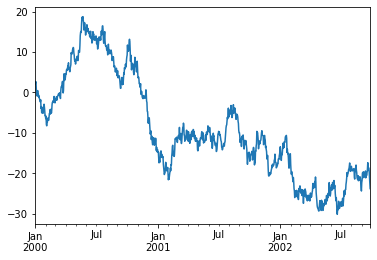

In [171]:
ts.plot();

#### If running under Jupyter Notebook, the plot will appear on plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.

In [172]:
plt.show();

#### On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [173]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [174]:
df

,A,B,C,D
2000-01-01,-1.021006,0.952451,-1.473362,-0.859994
2000-01-02,2.036531,-1.256311,0.131490,-0.970851
2000-01-03,-1.283196,-1.085240,-0.521920,-0.158986
2000-01-04,0.537651,0.133443,-0.405717,0.742096
2000-01-05,-0.228637,-1.187504,0.498627,0.170658
...,...,...,...,...
2002-09-22,-1.473636,1.231600,1.160913,0.724343
2002-09-23,-0.704480,0.954758,-2.322377,0.980061
2002-09-24,-0.809261,0.008658,0.974590,0.973435
2002-09-25,-1.422588,-0.134895,0.072578,0.227812


In [175]:
df = df.cumsum()

In [176]:
df

,A,B,C,D
2000-01-01,-1.021006,0.952451,-1.473362,-0.859994
2000-01-02,1.015525,-0.303860,-1.341872,-1.830845
2000-01-03,-0.267671,-1.389100,-1.863792,-1.989831
2000-01-04,0.269980,-1.255657,-2.269509,-1.247735
2000-01-05,0.041343,-2.443162,-1.770882,-1.077077
...,...,...,...,...
2002-09-22,-15.506547,-5.765598,-0.602546,-19.686730
2002-09-23,-16.211027,-4.810841,-2.924923,-18.706669
2002-09-24,-17.020288,-4.802182,-1.950334,-17.733234
2002-09-25,-18.442877,-4.937078,-1.877756,-17.505422


In [177]:
plt.figure();

<Figure size 432x288 with 0 Axes>

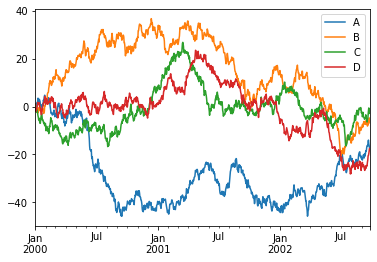

In [178]:
df.plot();

No handles with labels found to put in legend.


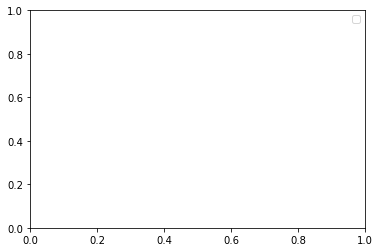

In [179]:
plt.legend(loc='best');

### 12. Getting data in/out

### 12.01 CSV

#### Writing to a csv file:

In [181]:
df.to_csv("foo.csv")

#### Reading from a csv file:

In [182]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.021006,0.952451,-1.473362,-0.859994
1,2000-01-02,1.015525,-0.303860,-1.341872,-1.830845
2,2000-01-03,-0.267671,-1.389100,-1.863792,-1.989831
3,2000-01-04,0.269980,-1.255657,-2.269509,-1.247735
4,2000-01-05,0.041343,-2.443162,-1.770882,-1.077077
...,...,...,...,...,...
995,2002-09-22,-15.506547,-5.765598,-0.602546,-19.686730
996,2002-09-23,-16.211027,-4.810841,-2.924923,-18.706669
997,2002-09-24,-17.020288,-4.802182,-1.950334,-17.733234
998,2002-09-25,-18.442877,-4.937078,-1.877756,-17.505422


### 12.02 HDF5

#### Reading and writing to HDFStores.

#### Writing to a HDF5 Store:

In [183]:
df.to_hdf("foo.h5", "df")

#### Reading from a HDF5 Store:

In [184]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-1.021006,0.952451,-1.473362,-0.859994
2000-01-02,1.015525,-0.303860,-1.341872,-1.830845
2000-01-03,-0.267671,-1.389100,-1.863792,-1.989831
2000-01-04,0.269980,-1.255657,-2.269509,-1.247735
2000-01-05,0.041343,-2.443162,-1.770882,-1.077077
...,...,...,...,...
2002-09-22,-15.506547,-5.765598,-0.602546,-19.686730
2002-09-23,-16.211027,-4.810841,-2.924923,-18.706669
2002-09-24,-17.020288,-4.802182,-1.950334,-17.733234
2002-09-25,-18.442877,-4.937078,-1.877756,-17.505422


### 12.03 EXCEL

#### Reading and writing to MS Excel.

#### Writing to an excel file:

In [185]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file:

In [186]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.021006,0.952451,-1.473362,-0.859994
1,2000-01-02,1.015525,-0.303860,-1.341872,-1.830845
2,2000-01-03,-0.267671,-1.389100,-1.863792,-1.989831
3,2000-01-04,0.269980,-1.255657,-2.269509,-1.247735
4,2000-01-05,0.041343,-2.443162,-1.770882,-1.077077
...,...,...,...,...,...
995,2002-09-22,-15.506547,-5.765598,-0.602546,-19.686730
996,2002-09-23,-16.211027,-4.810841,-2.924923,-18.706669
997,2002-09-24,-17.020288,-4.802182,-1.950334,-17.733234
998,2002-09-25,-18.442877,-4.937078,-1.877756,-17.505422


### 13. Gotchas

#### If you are attempting to perform an operation you might see an exception like:

In [187]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().